In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Computing t-SNE embedding


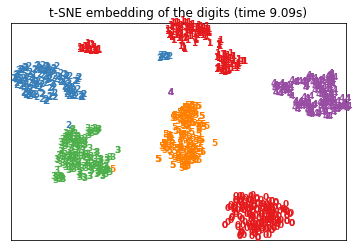

In [4]:
# coding='utf-8'

from time import time
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.manifold import TSNE
 
 
def get_data():
    digits = datasets.load_digits(n_class=6)
    data = digits.data
    label = digits.target
    n_samples, n_features = data.shape
    return data, label, n_samples, n_features
 
 
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
 
    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig
 
 
def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)
 
 
if __name__ == '__main__':
    main()